In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import Image

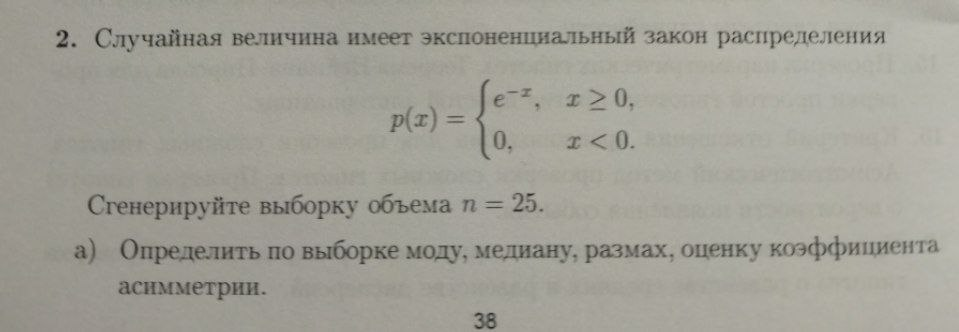

In [ ]:
Image("images/task_2_1.jpg")

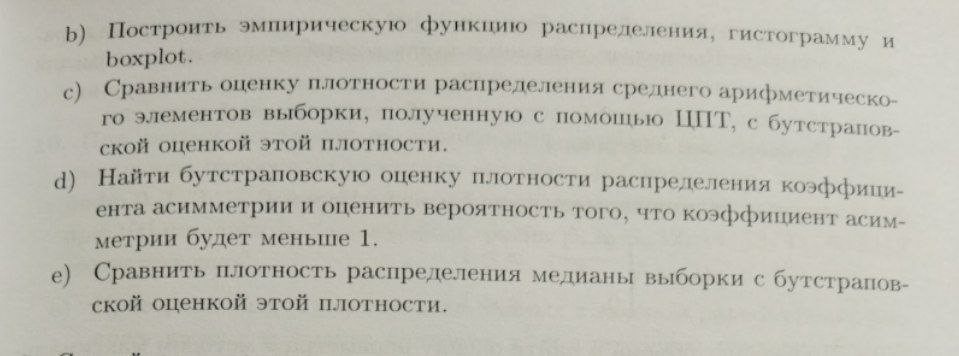

In [ ]:
Image("images/task_2_2.jpg")

***Задаем размер выборки***

In [4]:
n = 25

In [5]:
def p(x):
    if x < 0:
        return 0
    else:
        return np.exp(-x)
    
def F(x):
    if x < 0:
        return 0
    else:
        return (1 - np.exp(-x))
    
def F_reversed(y):
    if y < 0:
        return 0
    else:
        return -np.log(1 - y)

sample = [ F_reversed(random.random()) for _ in range(n) ]


***a)***

In [6]:
variation_series = sorted(sample)

#Моды
modes = []
met_numbers = [variation_series.count(x) for x in variation_series]
modas_met_number = max(met_numbers)
for i in range(n):
    if met_numbers[i] == modas_met_number:
        modes.append(variation_series[i])

#Медиана
mediana = np.median(variation_series)

#Размах
scope = variation_series[-1] - variation_series[0]

# оценка к-го центрального момента
def M_k(variation_series, k):
    return np.sum( (variation_series - variation_series.mean())**k ) / variation_series.size

#Оценка коэффициента ассиметрии
variation_series = np.array(variation_series)
asymmetry_coeff = M_k(variation_series, 3) / (M_k(variation_series, 2) ** 1.5)

print(f"Моды: {modes} \nМедиана: {mediana} \nРазмах: {scope} \nОценка коэффициента ассиметрии: {asymmetry_coeff}")

Моды: [0.02958626496443124, 0.0546706170954554, 0.08685188900202855, 0.2053347084102926, 0.24398395418650312, 0.2552233345234784, 0.27215818627088934, 0.3430751066131655, 0.3555321347139818, 0.356478885833884, 0.3844403331766462, 0.39438067576829944, 0.5604254394802598, 0.6254643254890144, 0.7417007974725052, 0.8607512580813426, 0.8834158473969395, 0.9227533392454893, 1.2713889058762107, 1.688233611585109, 2.0483843644560253, 2.209792901904766, 2.432885211293863, 2.7033109913923106, 3.8080802213504676] 
Медиана: 0.5604254394802598 
Размах: 3.7784939563860362 
Оценка коэффициента ассиметрии: 1.3853568561834435


***b)***

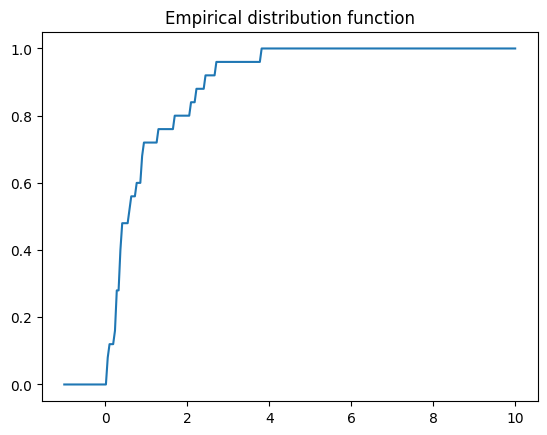

In [7]:
X = np.linspace(-1, 10, n*10)
Y_distribution = ( variation_series.reshape(-1, 1) < X.reshape(1, -1) ).mean(0)
plt.plot(X, Y_distribution)
plt.title("Empirical distribution function")
plt.show()

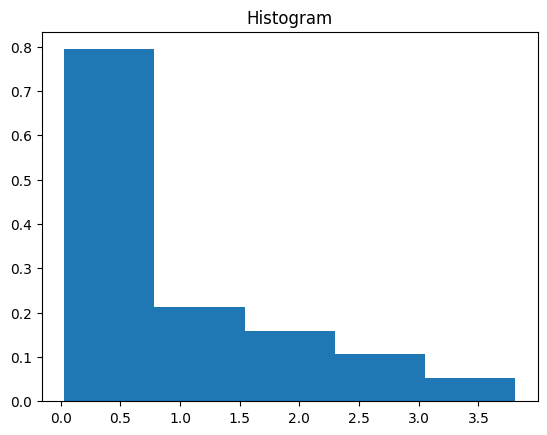

In [8]:
plt.hist(variation_series, int(1+np.log2(n)), density=True)
plt.title("Histogram")
plt.show()

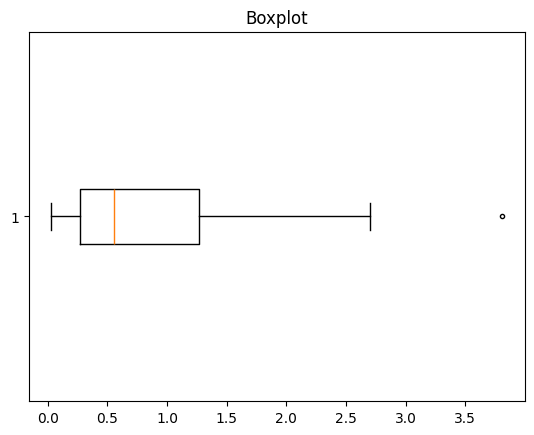

In [9]:
plt.boxplot(variation_series, vert=False, sym='.')
plt.title("Boxplot")
plt.show()

***c)***

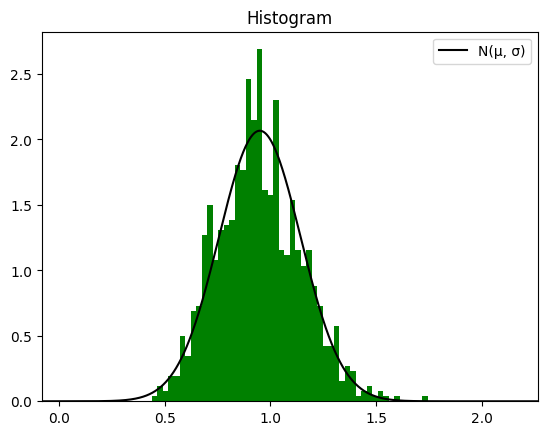

In [10]:
from scipy.stats import norm

bootstrap_size = 1000
bootstrap_samples_mean = [ np.mean(np.random.choice(variation_series, n, replace=True)) for _ in range(bootstrap_size) ]

mu = M_k(variation_series, 1)
sigma = M_k(variation_series, 2) ** 0.5

X = np.linspace(mu - sigma*3, mu + sigma*3, 10000)
Y = norm.pdf(X, np.mean(variation_series), sigma/(n**0.5))

plt.hist(bootstrap_samples_mean, 50, color='g', density=True)
plt.plot(X, Y, label='N(μ, σ)', color="black")
plt.title('Histogram')

width = max(bootstrap_samples_mean) - min(bootstrap_samples_mean)

plt.xlim(min(bootstrap_samples_mean)-width*0.4, max(bootstrap_samples_mean)+width*0.4)
plt.legend()
plt.show()

***d)***

P(asymmetry_coeff < 1) ≈ 0.1985


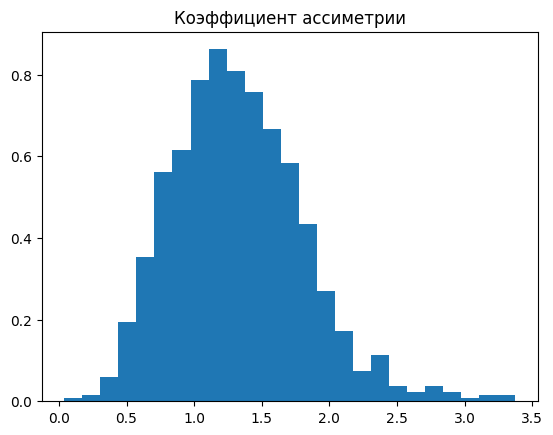

In [11]:
bootstrap_samples_asymmetry = []
for _ in range(bootstrap_size):
    boot_sample = np.array([np.random.choice(variation_series, n, replace=True)])
    bootstrap_samples_asymmetry.append( M_k(boot_sample, 3) / (M_k(boot_sample, 2)**1.5))

prob = 0.
for x in bootstrap_samples_asymmetry:
    if x < 1:
        prob += x
prob /= bootstrap_size

print(f"P(asymmetry_coeff < 1) ≈ {round(prob, 4)}")

plt.hist(bootstrap_samples_asymmetry, 25, density=True)
plt.title('Коэффициент ассиметрии')
plt.show()

***e)***

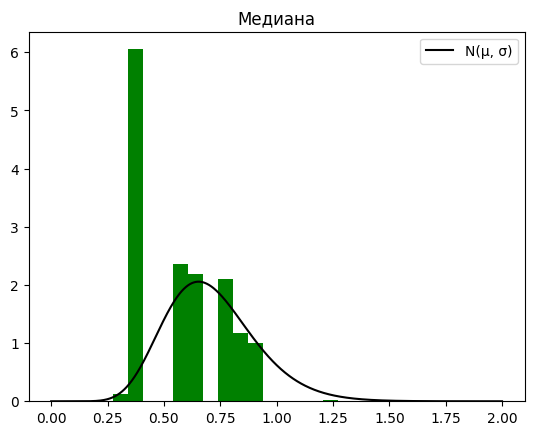

In [12]:
from math import comb

bootstrap_samples_median = [ np.median(np.random.choice(variation_series, n, replace=True)) for _ in range(bootstrap_size) ]

X = np.linspace(0, 2, bootstrap_size)
k = n // 2 + 1
Y = [ ( (1-F(x))**(n-k) ) * ( F(x)**(k-1) ) * n * p(x) * comb(n-1, k-1) for x in X ]

plt.hist(bootstrap_samples_median, 15, color='g', density=True)
plt.plot(X, Y, label='N(μ, σ)', color = 'black')
plt.title('Медиана')
plt.legend()
plt.show()